In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as P
import seaborn as sns
from scipy import stats

In [7]:
def bootstrapSamp(pb_runA, cov_tot):
    np.random.seed()
    _q = np.random.choice(range(0,len(pb_runA)),size=cov_tot,replace=True,p=pb_runA.astype(np.float))
    sim = np.zeros(len(pb_runA))
    for idx in _q:
        sim[idx] += 1
    return sim

def compute_FFC(base_run, pcr_run, include_nan=False):
    a = base_run/np.sum(base_run)
    b = pcr_run/np.sum(pcr_run)
    old_settings = np.seterr(divide='ignore',invalid='ignore')
    ampratio = b/a
    if include_nan == False:
        ffc = ampratio[np.isfinite(ampratio)]
    else:
        ffc = ampratio
    _=np.seterr(**old_settings)  # reset to default
    return ffc

## PCR sim
def binormSim(n, p, cyc=10):
    # simulate the number of molecules after "c" cycle
    # n: number of template molecules
    # p: probability of success PCR
    for i in range(cyc): 
        n += np.random.binomial(n, p, 1)
    return n.item(0)

In [8]:
"""
ready-to-sequence pool
run36: biased chip
run55: non-biased chip
"""
counts36 = np.load("./data/run36.npy")
counts55 = np.load("./data/run55.npy")

In [26]:
def plotHist(figName, counts):
    nFactor = np.median(counts)
    norm_counts = counts/nFactor
    weights = np.ones_like(np.array(norm_counts))/float(len(np.array(norm_counts)))
    
    sns.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
    plt.matplotlib.rcParams.update({'font.size':20})
    fig, axes = plt.subplots() 
    (count, bin_edges,_) = axes.hist(norm_counts, weights=weights,\
                                bins=np.arange(-0.5*1.0/nFactor,3,1.0/nFactor), edgecolor="None", alpha=0.5)
    mu = np.mean(norm_counts)
    sigma= np.std(norm_counts)
    s = np.random.normal(mu, sigma, len(counts))
    weights = np.ones_like(np.array(s))/float(len(np.array(s)))
    a,b = np.histogram(s,bins=bin_edges, weights=weights)
    plt.plot(b[:-1],a, "--", color="k")
    axes.set_xlabel("Norm. Coverage")
    axes.set_ylabel("Probability")
    #axes.set_yticks(yTicks)
    axes.set_xlim([0, 3.0])
    plt.savefig(figName, bbox_inches="tight", dpi=300, fmt="pdf")

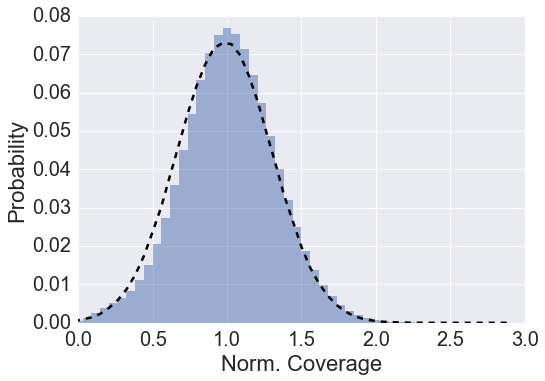

In [27]:
plotHist("./figs/run36_hist_190204_optimizedPool_probability.pdf", counts55)

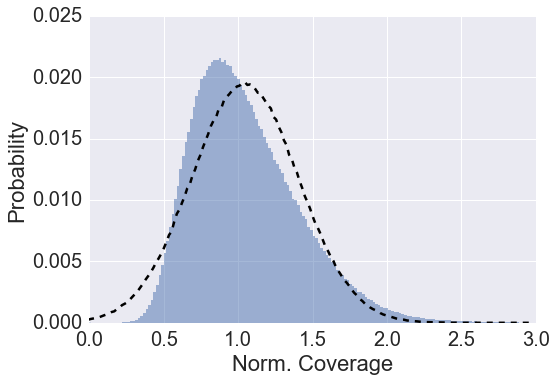

In [28]:
plotHist("./figs/run36_hist_190204_biasedPool_probability.pdf", counts36)

In [25]:
print np.mean(counts36), np.mean(counts55)

60.103123486493665 17.2107966055796
